# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

In [21]:
%pwd

u'/Users/lx/IPython-Notebook/pydata-book'

## A brief matplotlib API primer

In [4]:
import matplotlib.pyplot as plt

### Figures and Subplots

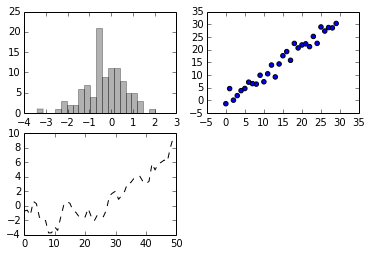

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(randn(50).cumsum(), 'k--')

_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

In [16]:
plt.close('all')

array([[<matplotlib.axes.AxesSubplot object at 0x11cdb8e90>,
        <matplotlib.axes.AxesSubplot object at 0x11d14b590>]], dtype=object)

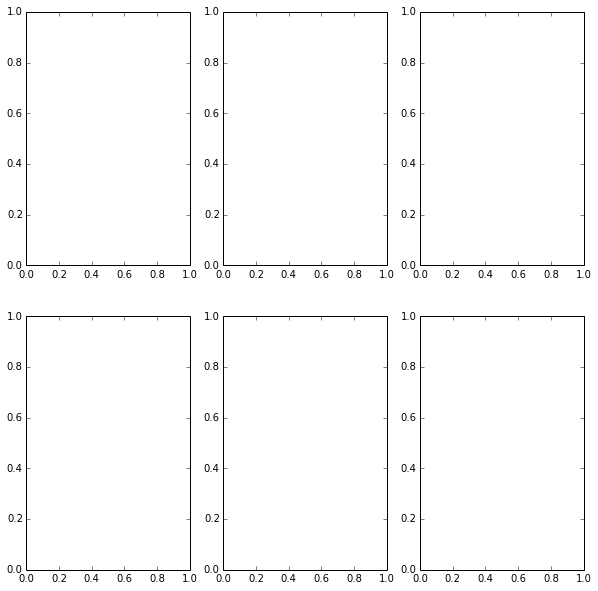

In [205]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [21]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

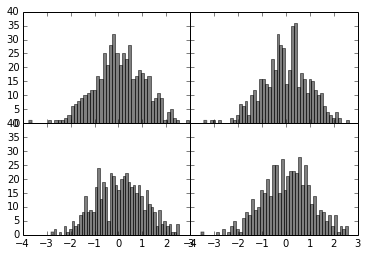

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [24]:
plt.figure()

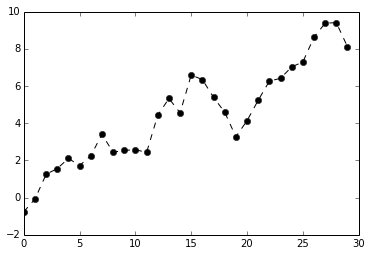

In [31]:
plt.plot(randn(30).cumsum(), 'ko--')

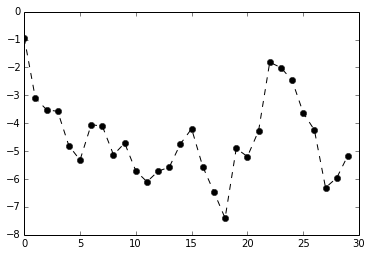

In [32]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [34]:
plt.close('all')
plt.close?

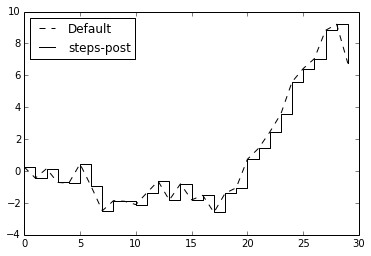

In [35]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

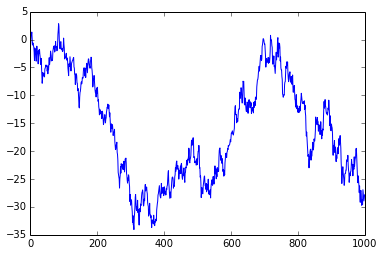

In [52]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

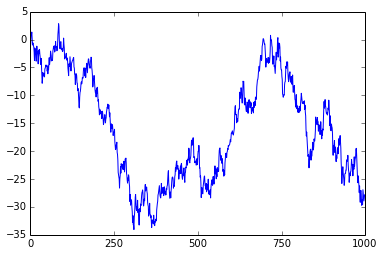

In [53]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
fig

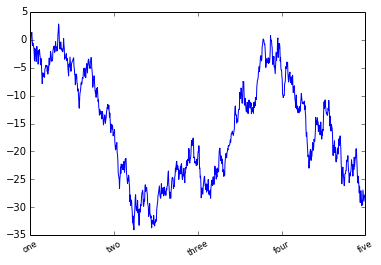

In [54]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
fig

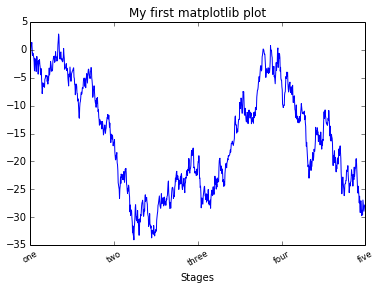

In [55]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

#### Adding legends

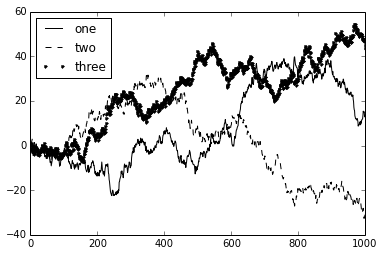

In [62]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

In [63]:
!cat ch08/spx.csv

,SPX
1990-02-01 00:00:00,328.79
1990-02-02 00:00:00,330.92
1990-02-05 00:00:00,331.85
1990-02-06 00:00:00,329.66
1990-02-07 00:00:00,333.75
1990-02-08 00:00:00,332.96
1990-02-09 00:00:00,333.62
1990-02-12 00:00:00,330.08
1990-02-13 00:00:00,331.02
1990-02-14 00:00:00,332.01
1990-02-15 00:00:00,334.89
1990-02-16 00:00:00,332.72
1990-02-20 00:00:00,327.99
1990-02-21 00:00:00,327.67
1990-02-22 00:00:00,325.7
1990-02-23 00:00:00,324.15
1990-02-26 00:00:00,328.67
1990-02-27 00:00:00,330.26
1990-02-28 00:00:00,331.89
1990-03-01 00:00:00,332.74
1990-03-02 00:00:00,335.54
1990-03-05 00:00:00,333.74
1990-03-06 00:00:00,337.93
1990-03-07 00:00:00,336.95
1990-03-08 00:00:00,340.27
1990-03-09 00:00:00,337.93
1990-03-12 00:00:00,338.67
1990-03-13 00:00:00,336.0
1990-03-14 00:00:00,336.87
1990-03-15 00:00:00,338.07
1990-03-16 00:00:00,341.91
1990-03-19 00:00:00,343.53
1990-03-20 00:00:00,341.57
1990-03-21 00:00:00,339.74
1990-03-22 00:00:00,335.69
1990-03-23 00:00:00,337.22
1990-03-26 00:00:00,337.6

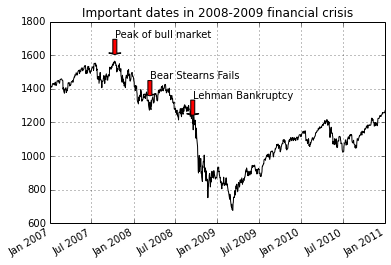

In [73]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

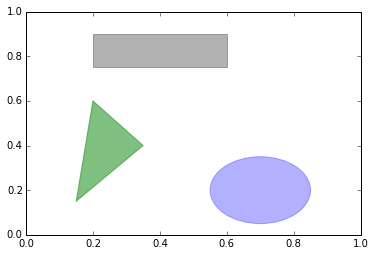

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

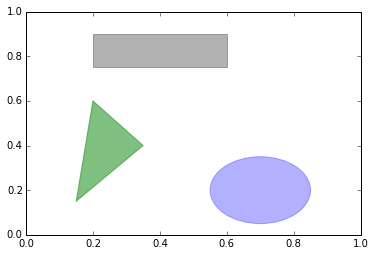

In [75]:
fig

In [76]:
fig.savefig('figpath.svg')

In [77]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [78]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

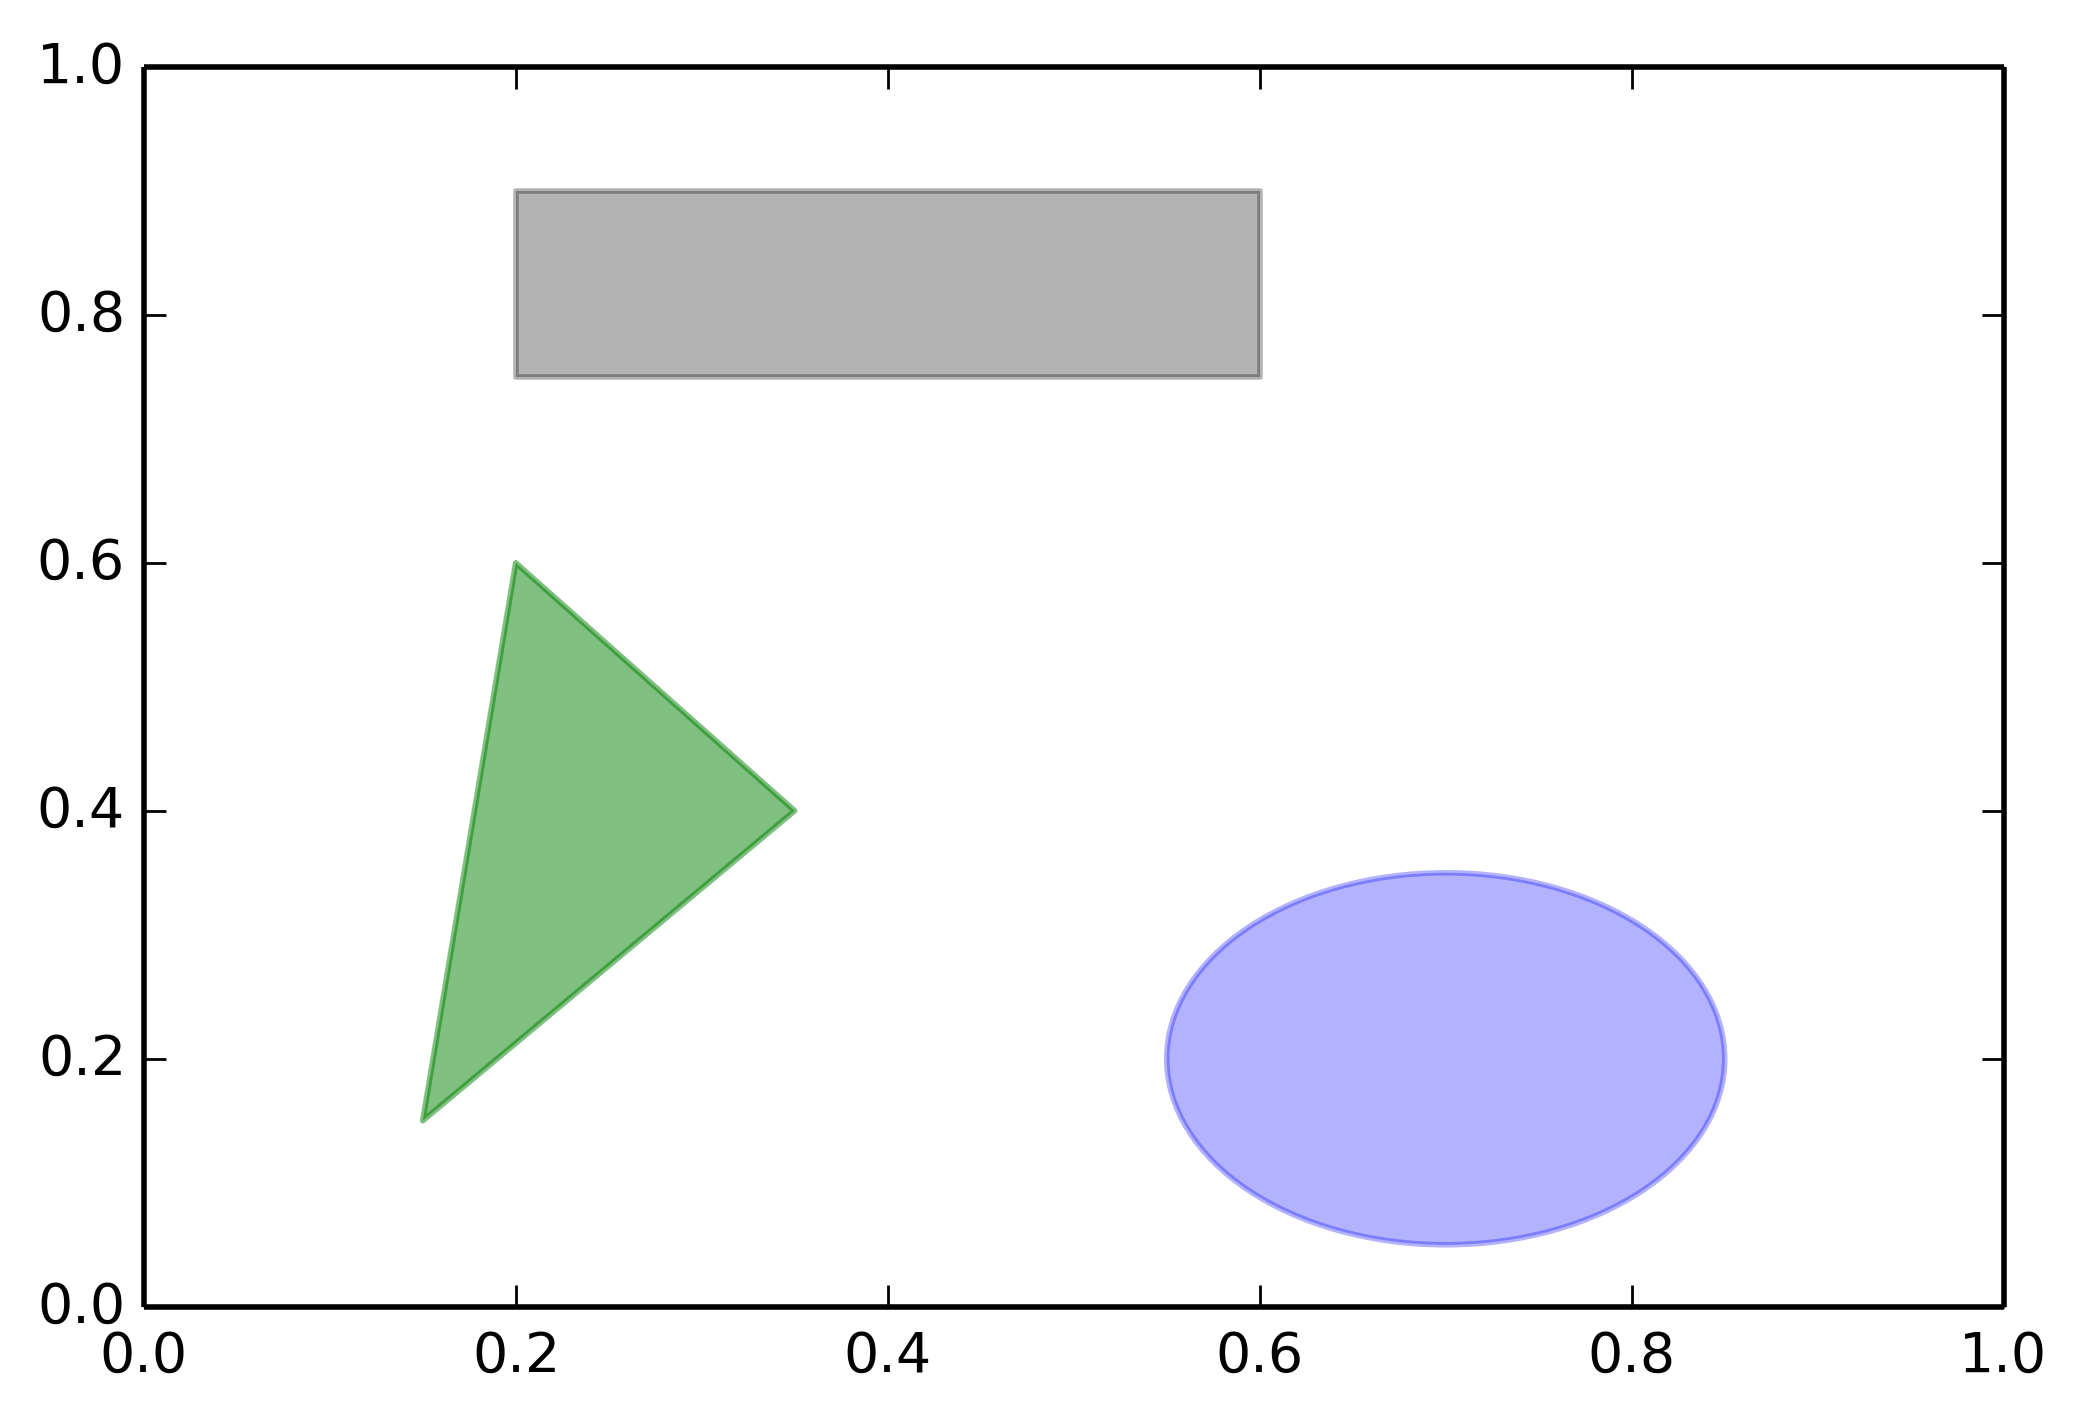

In [81]:
from IPython.display import Image
Image(filename='figpath.png')

### matplotlib configuration

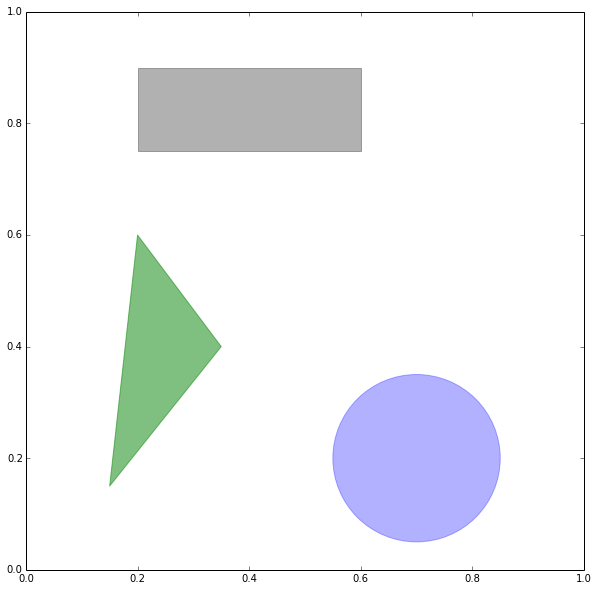

In [85]:
plt.rc('figure', figsize=(10, 10)) # Global
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Plotting functions in pandas

### Line plots

In [82]:
plt.close('all')

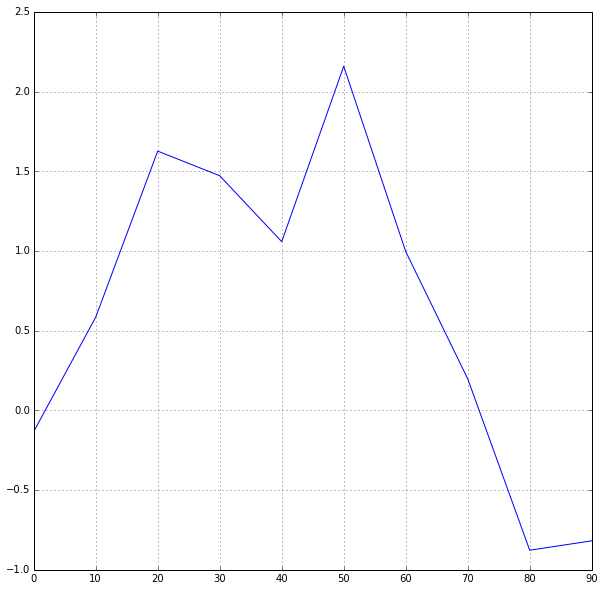

In [84]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

           A         B         C         D
0  -0.186466 -0.451405 -0.724335 -0.773517
10 -1.787897 -0.900319  0.873060 -0.995224
20 -1.714420 -0.803824  0.527677 -0.162991
30 -1.060629 -1.013317  1.229557 -1.420798
40 -0.866427 -1.914713  1.136532 -1.362027
50 -0.206747 -2.703825 -0.367819 -1.770187
60  0.590190 -2.914553  1.952398 -0.965289
70  0.371765 -2.645674  1.961704 -1.452296
80  0.452110 -1.801946  1.618507 -0.377476
90  1.543783 -0.897977  0.552785  0.840650


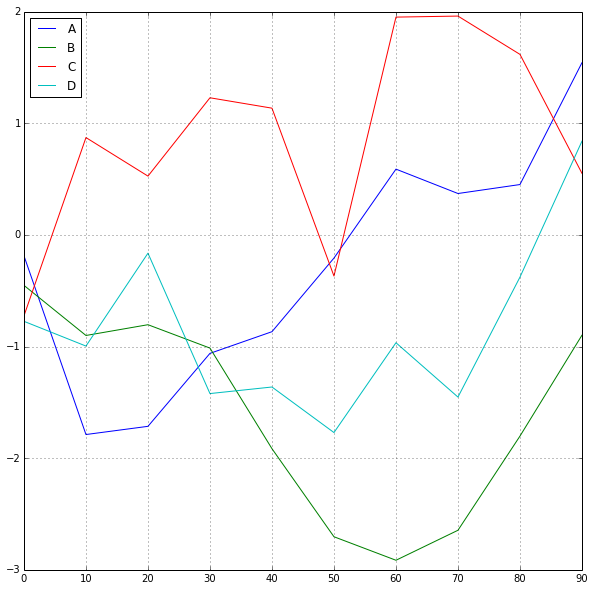

In [95]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
print df
df.plot()

In [97]:
DataFrame.plot?

In [96]:
np.random.randn(5).cumsum

<function cumsum>

In [108]:
np.array([[1,2,3,4,5],[1,3,5,7,9]]).cumsum(0) # according to axis 0

array([[ 1,  2,  3,  4,  5],
       [ 2,  5,  8, 11, 14]])

In [110]:
np.array([[1,2,3,4,5],[1,3,5,7,9]]).cumsum(1) # according to axis 1

array([[ 1,  3,  6, 10, 15],
       [ 1,  4,  9, 16, 25]])

### Bar plots

In [113]:
np.random.rand?

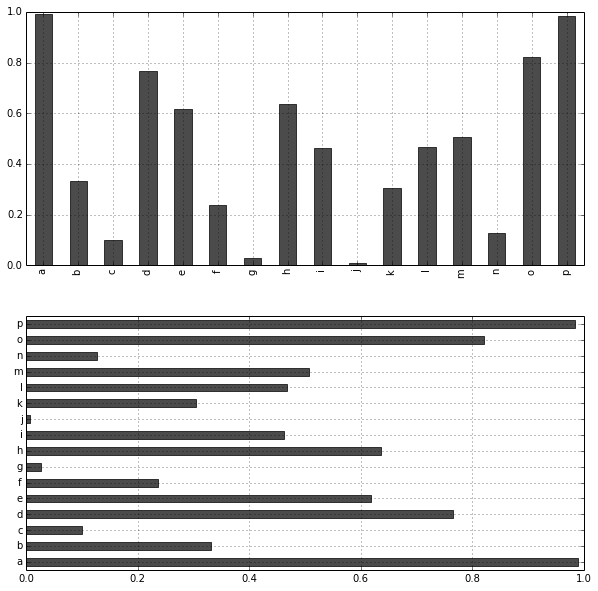

In [117]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [120]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.651060,0.430688,0.376826,0.770640
two,0.265974,0.076129,0.954954,0.319927
three,0.048793,0.985990,0.062180,0.481306
four,0.954168,0.765906,0.313998,0.746366
five,0.412314,0.272514,0.584100,0.628331
six,0.167171,0.147531,0.079337,0.829137


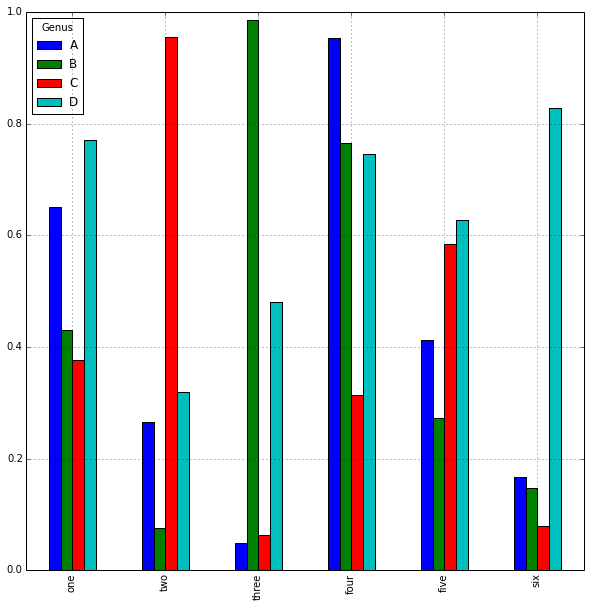

In [122]:
df.plot(kind='bar')

In [119]:
plt.figure()

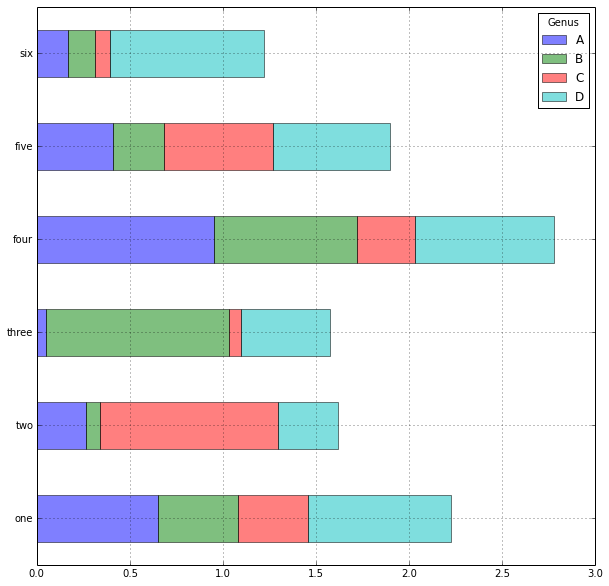

In [123]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [126]:
dummy_series = pd.Series([1,1,2,2,2,3,3,3,3,4,4,5])
dummy_series

0     1
1     1
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     4
10    4
11    5
dtype: int64

In [127]:
dummy_series.value_counts()

3    4
2    3
4    2
1    2
5    1
dtype: int64

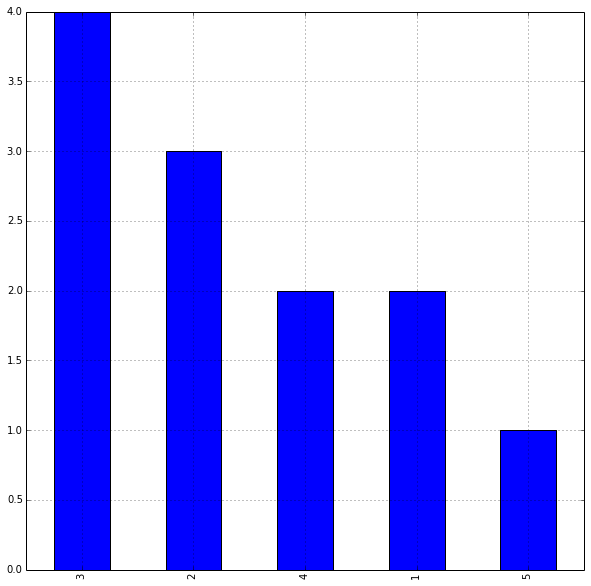

In [128]:
dummy_series.value_counts().plot(kind='bar')

In [148]:
df = pd.DataFrame([
        [1,2,3,4,5],
        [1,3,4,2,3],
        [3,3,4,5,5]
    ])
df

,0,1,2,3,4
0,1,2,3,4,5
1,1,3,4,2,3
2,3,3,4,5,5


In [164]:
def value_counts(x):
    return x.value_counts()

In [171]:
df.apply(value_counts)

,0,1,2,3,4
1,2,NaN,NaN,NaN,NaN
2,NaN,1,NaN,1,NaN
3,1,2,1,NaN,1
4,NaN,NaN,2,1,NaN
5,NaN,NaN,NaN,1,2


In [172]:
df.apply(value_counts).fillna(0).apply(sum,axis=1) # count the number of times each element occurs

1    2
2    2
3    5
4    3
5    3
dtype: float64

In [203]:
pd.Series.plot?

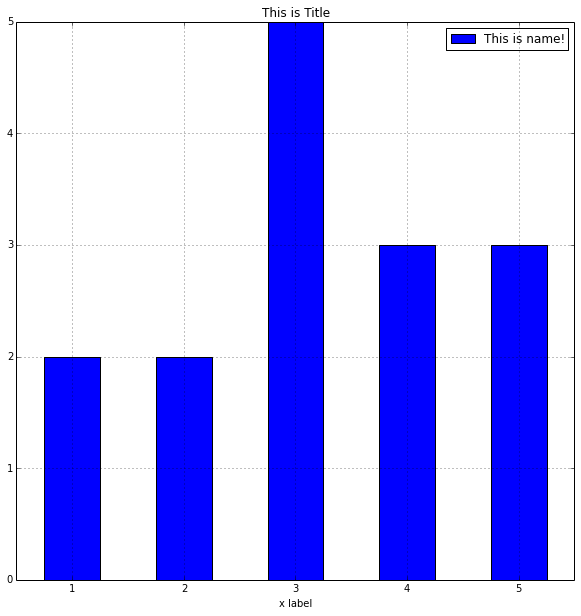

In [211]:
# two ways to set the x label
count_series = df.apply(value_counts).fillna(0).apply(sum,axis=1)
# no.1 use the index.name property
count_series.index.name = 'x label'
count_series.name = 'This is name!'
ax = count_series.plot(kind='bar', 
                  rot=0,
                  label='Number of Times', # This label won't work, use Series.name instead
                  legend=True,
                  title='This is Title',
                 )
ax.legend(loc='best')
# no.2 use the ax object's set_xlabel method
# ax.set_xlabel('Number of Times') 

In [2]:
!cat ch08/tips.csv

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2.0,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2
10.27,1.71,Male,No,Sun,Dinner,2
35.26,5.0,Female,No,Sun,Dinner,4
15.42,1.57,Male,No,Sun,Dinner,2
18.43,3.0,Male,No,Sun,Dinner,4
14.83,3.02,Female,No,Sun,Dinner,2
21.58,3.92,Male,No,Sun,Dinner,2
10.33,1.67,Female,No,Sun,Dinner,3
16.29,3.71,Male,No,Sun,Dinner,3
16.97,3.5,Female,No,Sun,Dinner,3
20.65,3.35,Male,No,Sat,Dinner,3
17.92,4.08,Male,No,Sat,Dinner,2
20.29,2.75,Female,No,Sat,Dinner,2
15.77,2.23,Female,No,Sat,Dinner,2
39.42,7.58,Male,No,Sat,Dinner,4
19.82,3.18,Male,No,Sat,Dinner,2
17.81,2.34,Male,No,Sat,Dinner,4
13.37,2.0,Male,No,Sat,Dinner,2
12.69,2.0,Male,No,Sat,Dinner,2
21.7,4.3,Male,No,Sat,Dinner,2
19.65,3.0,Female,No,Sat,Di

In [10]:
pd.crosstab?

In [3]:
tips = pd.read_csv('ch08/tips.csv')
# print tips
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


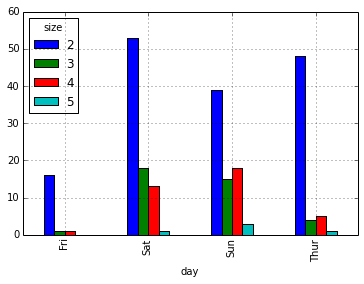

In [5]:
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts.plot(kind='bar')

In [9]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [7]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


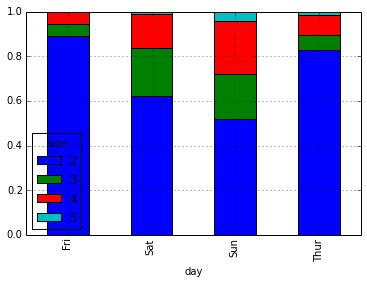

In [8]:
party_pcts.plot(kind='bar', stacked=True)

### Histograms and density plots

In [10]:
plt.figure()

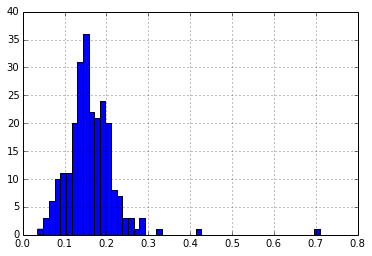

In [15]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [16]:
plt.figure()

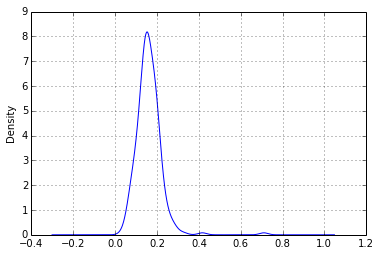

In [17]:
tips['tip_pct'].plot(kind='kde')

In [18]:
plt.figure()

In [40]:
arr1 = np.array(range(5))
arr2 = np.array(range(2,7))
print arr1
print arr2
arr3  =np.concatenate((arr1, arr2))
arr3

[0 1 2 3 4]
[2 3 4 5 6]


array([0, 1, 2, 3, 4, 2, 3, 4, 5, 6])

In [21]:
np.concatenate?

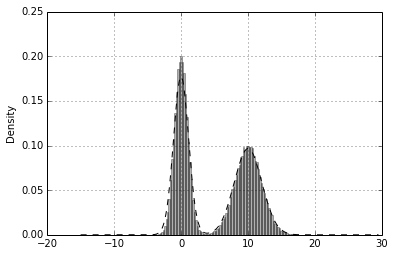

In [39]:
comp1 = np.random.normal(0, 1, size=50000)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=50000)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [41]:
!cat ch08/macrodata.csv

year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0
1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.83,2.34,0.74
1959.0,3.0,2775.488,1751.8,289.226,491.26,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.5,5.2,180.007,2.31,1.19
1960.0,2.0,2834.39,1792.9,298.152,460.4,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.7,-0.34
1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.4,2.77
1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81
1961.0,3.0,2918.419,1823

In [46]:
np.diff?

In [56]:
x = np.array([1, 2, 4, 7, 0])
print type(x)
np.diff(x)

<type 'numpy.ndarray'>


array([ 1,  2,  3, -7])

In [50]:
np.cumsum?

In [53]:
np.cumsum(np.concatenate(([1], np.diff(x))))

array([1, 2, 4, 7, 0])

In [60]:
np.log?

In [65]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data)
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,5.379386,7.296210,0.157004,1.791759
199,5.357407,7.362962,-2.120264,1.931521
200,5.359746,7.373249,-1.514128,2.091864
201,5.368165,7.410710,-1.714798,2.219203
202,5.377059,7.422912,-2.120264,2.261763


In [74]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [75]:
plt.figure()

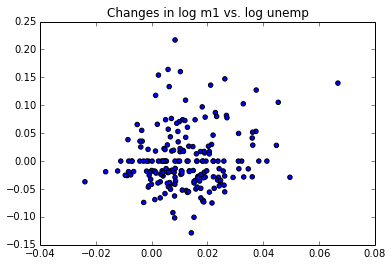

In [76]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes.AxesSubplot object at 0x10c241810>,
        <matplotlib.axes.AxesSubplot object at 0x10dada5d0>]], dtype=object)

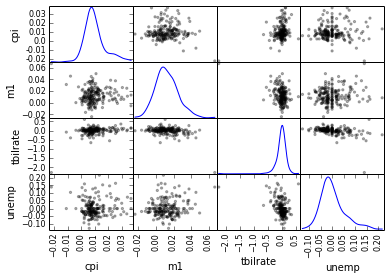

In [77]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [78]:
!cat ch08/Haiti.csv

Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
4052,* URGENT * Type O blood donations needed in #Jacmel #Haiti,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently needs a O- blood transfusion 4 woman who just gave birth. please see Via @coreyrateau (Twitter),"1. Urgences | Emergency, 3. Public Health, ",18.233333,-72.533333,YES,NO
4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to Haiti through your financial gift and donations.,"1. Urgences | Emergency, 2. Urgences logistiques | Vital Lines, ",50.226029,5.729886,NO,NO
4050,how haiti is right now and how it was during the earthquake,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to do a report so here it goes haiti got hit by an earthquake and several died they found a kot of people alive they could still be looking so far most kids survived some did not,"2. Urgences logistiques | 

In [14]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 308.8+ KB


In [15]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [16]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [17]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [18]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [7]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


In [19]:
set.union({1,2,3}, {5,6}, {2,4})

{1, 2, 3, 4, 5, 6}

In [20]:
sorted(set.union({1,2,3}, {5,6}, {2,4}))

[1, 2, 3, 4, 5, 6]

In [19]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [9]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [20]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['6c']

'Earthquake and aftershocks'

In [12]:
english_mapping['2a']

'Food Shortage'

In [21]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [14]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [22]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [16]:
data.join?

In [72]:
DataFrame.add_prefix?

In [23]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


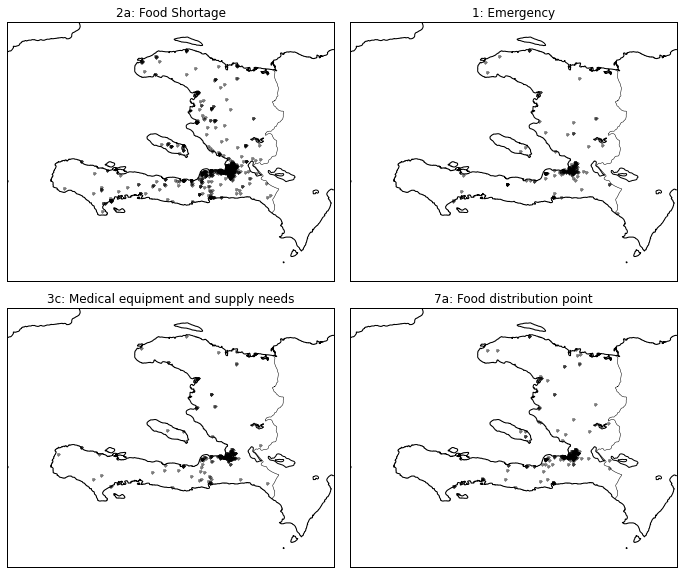

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

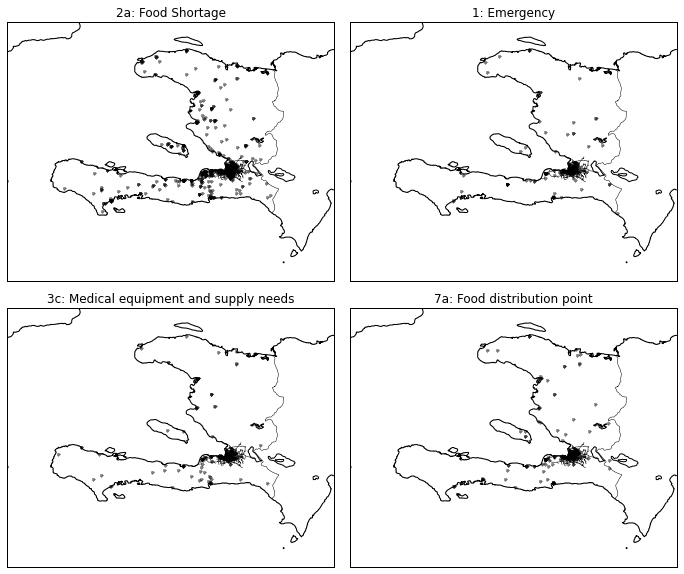

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)
        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)
        
        m.plot(x, y, 'k.', alpha=0.5)
        shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads' # add the road map
        # should set the proper lat and lon to get the best effect
        m.readshapefile(shapefile_path, 'roads')                      
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        
make_plot()

In [ ]:
Basemap.readshapefile?

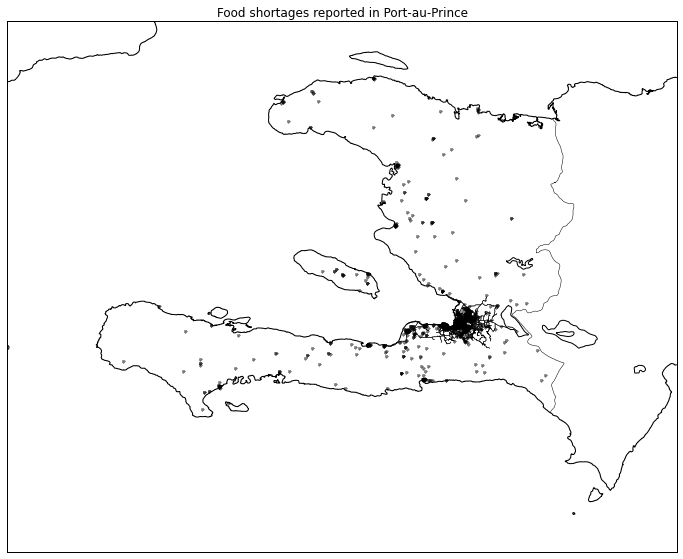

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
lllat=17.25; urlat=20.25; lllon=-75; urlon=-71
m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

cat_data = data[data['category_2a'] == 1]

# compute map proj coordinates.
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

m.plot(x, y, 'k.', alpha=0.5)
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads' # add the road map
# should set the proper lat and lon to get the best effect
m.readshapefile(shapefile_path, 'roads')
ax.set_title('Food shortages reported in Port-au-Prince')
plt.savefig( "Food shortages reported in Port-au-Prince.png", dpi=200 )